### IS Proof of concept

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import operator
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import itertools

In [2]:
import nltk
from nltk import bigrams
import collections

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
import pythainlp
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp import sent_tokenize
from pythainlp.corpus import thai_stopwords

In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [6]:
from selenium import webdriver

Web scraping

In [7]:
url = 'https://pantip.com/topic/33377805'
driver = webdriver.Chrome(executable_path='selenium/chromedriver.exe')
driver.get(url)
content=driver.page_source
soup=BeautifulSoup(content,'lxml')

In [8]:
topic = soup.find("h2",{"class":"display-post-title"})

In [9]:
topic.text

'ใครดื่มนมเมจิบ้างง หนูมีคำถามค่า'

In [10]:
textList = []
# ใช้ class_ เพื่อดึง div class จำเพาะ เพื่อไม่ให้ข้อความอื่นที่ไม่ต้องการปนมา
for div in soup.find_all("div", class_=lambda value: value and value=="display-post-story"):
    if len(str(div.text).strip()) > 1:
        textList.append(str(div.text).strip())

In [11]:
driver.quit()

Clean data & NLP Tokenized

In [13]:
def checkStopwords(w):
    returnList = []
    stopwords = list(thai_stopwords())
    for i in w:  # comment
        if i not in stopwords:
            returnList.append(i)
    return returnList

In [66]:
corpus = []

words = set(thai_words())  # thai_words() returns frozenset
words.add("ซีพี")
words.add("เมจิ")
words.add("สตอเบอรี่")  # Isaac
words.add("ช็อกโกแล็ต")
words.add("คอนเฟล็ก")
words.add("dairy home")
words.add("พาสเจอร์ไรซ์")
words.add("ดัชมิลล์selected")
words.add('grass fed milk')
custom_tokenizer = Tokenizer(words)

# เอาข้อคำถามออก
del textList[0]

for ii in textList:
    #wtkn = sent_tokenize(ii, engine="whitespace+newline")
    wtkn = custom_tokenizer.word_tokenize(ii)
    wtkn = [x for x in wtkn if x not in ['',' ','\n','\t','-','+','(',')','.','..','\t\t\t\t\t\t','\xa0\xa0',':']]
    wtkn = [y.strip('.') for y in wtkn]
    wtkn = [s for s in wtkn if not s.isdigit()]
    corpus.append(wtkn)

In [67]:
# Merge list
merge_corpus_list = list(itertools.chain.from_iterable(corpus))

In [68]:
chk_corpus_list = checkStopwords(merge_corpus_list)

In [69]:
# Make unique
set_unique_list = set(chk_corpus_list)                         
unique_corpus = list(set_unique_list)

สร้าง Co-occurence matrix with biGram

In [54]:
#wordfreq = []
#for w in merge_corpus_list:
#    wordfreq.append(merge_corpus_list.count(w))
#word_freq = list(zip(merge_corpus_list, wordfreq))

In [70]:
bigrm = list(bigrams(chk_corpus_list))

In [88]:
bigrm_cnt = dict(collections.Counter(bigrm))

In [138]:
bigrm_cnt

{('ชอบ', 'กิน'): 1,
 ('กิน', 'นม'): 1,
 ('นม', 'กล้วย'): 1,
 ('กล้วย', 'เซเว่น'): 1,
 ('เซเว่น', 'ซีพี'): 1,
 ('ซีพี', 'เมจิ'): 1,
 ('เมจิ', 'ซื้อ'): 1,
 ('ซื้อ', 'ยี่ห้อ'): 1,
 ('ยี่ห้อ', 'ประจำ'): 1,
 ('ประจำ', '12.50'): 1,
 ('12.50', 'บาท'): 1,
 ('บาท', 'อร่อย'): 1,
 ('อร่อย', 'แยก'): 1,
 ('แยก', 'รส'): 1,
 ('รส', 'ชาด'): 1,
 ('ชาด', 'เหมือนกัน'): 1,
 ('เหมือนกัน', 'อะ'): 1,
 ('อะ', 'ซื้อ'): 1,
 ('ซื้อ', 'ลูก'): 1,
 ('ลูก', 'ดื่ม'): 1,
 ('ดื่ม', 'ประจำ'): 1,
 ('ประจำ', 'หอม'): 1,
 ('หอม', 'อร่อย'): 3,
 ('อร่อย', 'แล้วก็'): 1,
 ('แล้วก็', 'เข้มข้น'): 1,
 ('เข้มข้น', 'ยี่ห้อ'): 2,
 ('ยี่ห้อ', 'รสจืด'): 1,
 ('รสจืด', 'สีน้ำเงิน'): 1,
 ('สีน้ำเงิน', 'เลือก'): 1,
 ('เลือก', 'พาสเจอร์ไรซ์'): 1,
 ('พาสเจอร์ไรซ์', 'ฝา'): 1,
 ('ฝา', 'ซีล'): 1,
 ('ซีล', 'สี'): 1,
 ('สี', 'เงิน'): 1,
 ('เงิน', 'ชั้น'): 1,
 ('ชั้น', 'นึง'): 1,
 ('นึง', 'รส'): 1,
 ('รส', 'อร่อย'): 1,
 ('อร่อย', 'ความรู้สึก'): 1,
 ('ความรู้สึก', 'เทียบ'): 1,
 ('เทียบ', 'ดัชมิลล์selected'): 1,
 ('ดัชมิลล์selected', 'รู้'): 1,
 ('ร

In [114]:
bigram_df = pd.DataFrame()
bigram_df = bigram_df.append(bigrm_cnt, ignore_index=True).fillna(0)

In [141]:
bigram_df.T.head(10)

,0
"(ชอบ, กิน)",1.0
"(กิน, นม)",1.0
"(นม, กล้วย)",1.0
"(กล้วย, เซเว่น)",1.0
"(เซเว่น, ซีพี)",1.0
"(ซีพี, เมจิ)",1.0
"(เมจิ, ซื้อ)",1.0
"(ซื้อ, ยี่ห้อ)",1.0
"(ยี่ห้อ, ประจำ)",1.0
"(ประจำ, 12.50)",1.0


In [115]:
#df = bigram_df.T
#df.index
#df.index.name = 'bigram'
#df.columns = ['count']

สร้างกราฟ

In [136]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in bigrm_cnt.items():
    G.add_edge(k[0], k[1], weight=(v * 10))

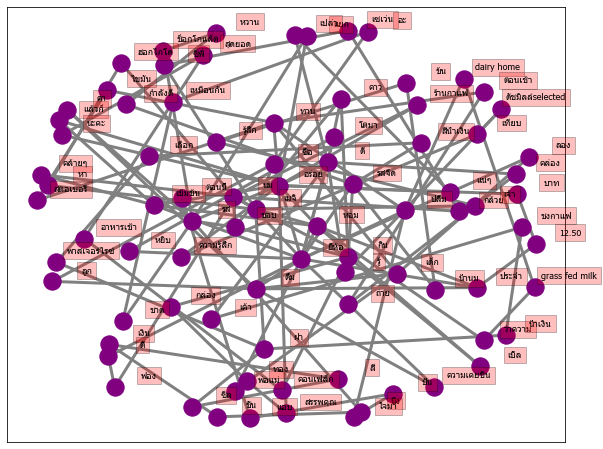

In [137]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center',fontname='Tahoma', fontsize=9)

plt.show()

ค้นหา Community detection